# 요구사항
1. 주어진 `floorplan`이 `adj_requirement`에서 정의된 방 간의 인접 요구 사항을 얼마나 잘 만족하는지 측정하는 피트니스 함수를 
2. 피트니스 함수는 주어진 `floorplan`이 인접 요구 사항을 얼마나 충족하는지를 계산하여 그에 따라 점수를 반환

## 1. 문제 해결 단계

1. **인접성 확인**: 주어진 `floorplan`에서 두 방이 서로 인접해 있는지 확인
2. **피트니스 계산**: `adj_requirement`의 요구 사항을 얼마나 잘 충족하는지를 기반으로 점수를 계산

## 2. 코드 설명:
1. **create_adjacency_list 함수**:

- BFS(너비 우선 탐색)을 사용하여 각 방의 시작 셀에서 연결된 모든 셀을 탐색합니다. 탐색 중 다른 방과 인접하게 되면 인접 리스트에 그 정보를 추가합니다.
- visited 배열을 사용하여 이미 탐색된 셀을 건너뜁니다. 이를 통해 불필요한 탐색을 줄일 수 있습니다.
이 방법은 필요한 셀만 탐색하여 인접 리스트를 생성하므로, 전체 floorplan을 완전히 순회하는 것보다 효율적입니다.
각 방에 대해 한 번의 BFS만 수행하므로, floorplan에서 방이 많이 분리된 구조일수록 성능 이점이 있습니다.
- BFS/DFS를 통해 방을 한 번에 탐색하면서 인접 리스트를 생성하면, 불필요한 탐색을 줄일 수 있습니다.
- 이 방법들은 데이터의 크기와 구조에 따라 성능이 다를 수 있지만, 일반적으로 큰 floorplan에서 더 큰 효율성을 제공합니다.
- 
2. **fitness_function 함수**:  `adj_requirement`의 각 쌍에 대해 두 방이 실제로 인접해 있는지 확인. 인접해 있으면 점수를 증가. 그런 다음 전체 요구사항 중 몇 퍼센트가 충족되었는지를 계산하여 피트니스 점수를 반환

3. **피트니스 점수 해석**: 피트니스 점수는 0과 1 사이의 값으로 나타납니다. 1에 가까울수록 `floorplan`이 주어진 `adj_requirement`를 잘 충족하는 것이고, 0에 가까울수록 충족하지 못하는 것입니다.

4. **최적화**: `processed_rooms 집합` :processed_rooms는 이미 인접 리스트가 생성된 방 번호를 추적합니다.
방 번호가 processed_rooms에 존재하는 경우, 해당 방에 대해 이미 인접 리스트가 만들어졌음을 의미하므로 추가 계산을 피할 수 있습니다.
조건문: floorplan[r, c]가 -1이 아니고, 방문되지 않았으며(visited[r, c] == False), processed_rooms에 아직 없는 경우에만 bfs를 호출합니다. 이는 불필요한 중복 계산을 피할 수 있습니다.
5. 
### 실행 예시:
이 코드를 실행하면 주어진 `floorplan`이 `adj_requirement`를 얼마나 잘 충족하는지를 0과 1 사이의 점수로 반환합니다. 이 점수를 통해 floorplan이 얼마나 효율적으로 설계되었는지 평가할 수 있습니다.



In [5]:
import numpy as np
from collections import defaultdict, deque

def create_adjacency_list(floorplan):
    """
    floorplan을 순회하지 않고 각 방의 셀을 기준으로 인접 리스트를 만드는 함수.
    BFS(너비 우선 탐색)을 사용하여 이미 탐색된 셀은 건너뜁니다.
    """
    rows, cols = floorplan.shape
    adj_list = defaultdict(set)
    visited = np.full(floorplan.shape, False)  # 방문한 셀을 추적
    processed_rooms = set()  # 이미 인접 리스트가 만들어진 방 번호를 추적

    def bfs(r, c):
        queue = deque([(r, c)])
        room = floorplan[r, c]
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # 상, 하, 좌, 우

        while queue:
            x, y = queue.popleft()
            visited[x, y] = True

            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny]:
                    if floorplan[nx, ny] == room:
                        queue.append((nx, ny))
                    elif floorplan[nx, ny] != -1:
                        adj_list[room].add(floorplan[nx, ny])
                        adj_list[floorplan[nx, ny]].add(room)

    for r in range(rows):
        for c in range(cols):
            room = floorplan[r, c]
            if room != -1 and not visited[r, c] and room not in processed_rooms:
                bfs(r, c)
                processed_rooms.add(room)

    return adj_list

def fitness_function(floorplan, adj_requirement):
    adj_list = create_adjacency_list(floorplan)
    score = 0
    total_requirements = len(adj_requirement)
    
    for room1, room2 in adj_requirement:
        if room2 in adj_list[room1]:
            score += 1
    
    fitness = score / total_requirements
    return fitness

# 예시 floorplan
grid = np.array([
    [ 4,  4,  4,  4,  1, -1, -1],
    [ 2,  2,  4,  1,  1,  5,  5],
    [ 2,  2,  3,  3,  1,  5, -1],
    [-1, -1,  3,  3, -1, -1, -1]
])

# 예시 adj_requirement
adj_requirement = [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (4, 3)]

# 피트니스 함수 계산
fitness = fitness_function(grid, adj_requirement)
print(f"Fitness Score: {fitness}")


Fitness Score: 0.8333333333333334


# Selection with Fitness
1. Softmax 함수 적용.  => 여전히 미미한 차이

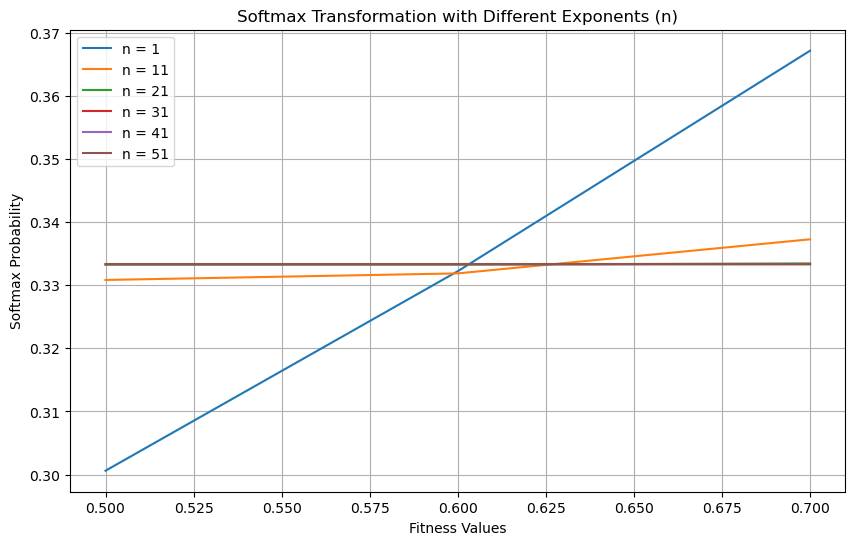

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 예시 fitness 값
fitness_values = np.array([0.5, 0.6, 0.7])

# Softmax 함수 정의
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

# 다양한 n 값을 사용한 softmax 결과 계산
n_values = np.arange(1, 60, 10)
softmax_results = []

for n in n_values:
    scaled_values = fitness_values ** n
    softmax_result = softmax(scaled_values)
    softmax_results.append(softmax_result)

# 그래프 그리기
plt.figure(figsize=(10, 6))

for i, n in enumerate(n_values):
    plt.plot(fitness_values, softmax_results[i], label=f'n = {n}')

plt.xlabel('Fitness Values')
plt.ylabel('Softmax Probability')
plt.title('Softmax Transformation with Different Exponents (n)')
plt.legend()
plt.grid(True)
plt.show()


# 지수 함수로 변환 
max 값이 작아지는 문제

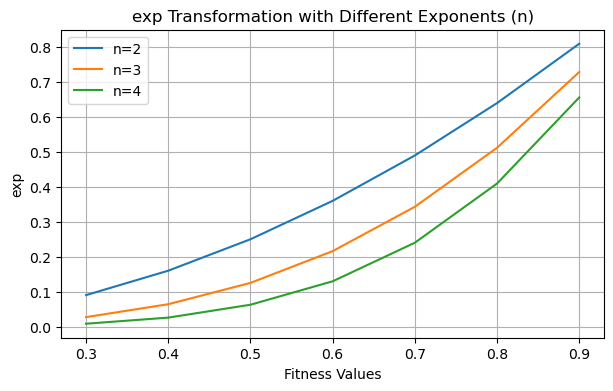

In [18]:
# 지수함수로 변환
import numpy as np
import matplotlib.pyplot as plt

# 예시 fitness 값
fitness_values = np.array([0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9])
n_values = np.arange(2, 5)
calc_exp = lambda x, n : [x**n for x in fitness_values]
exp_values = []
plt.figure(figsize=(7, 4))

for j in n_values:
    plt.plot(fitness_values, calc_exp(fitness_values, j), label=f'n={j}' )


plt.xlabel('Fitness Values')
plt.ylabel('exp')
plt.title('exp Transformation with Different Exponents (n)')
plt.legend()
plt.grid(True)
plt.show()


# 3. Min-Max Scaling 후 지수 변환
만약 fitness 값이 0과 1 사이로 정상화된 값이라면, 이를 먼저 Min-Max Scaling으로 0에서 1 사이의 값을 다시 0에서 어떤 값 사이로 확장한 다음 지수 변환

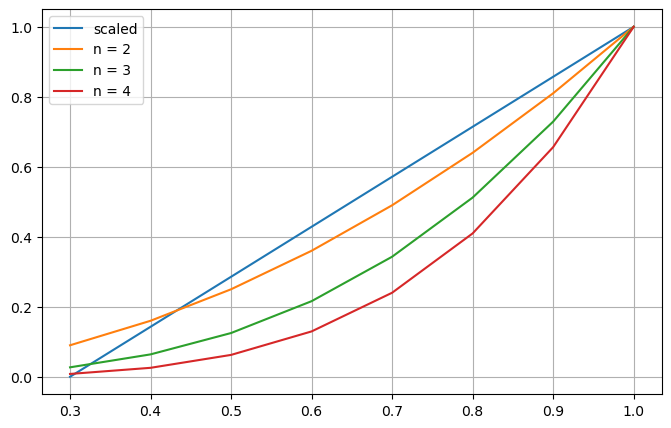

In [31]:
min_fitness = min(fitness_values)
max_fitness = max(fitness_values)
fitness_values = np.array([0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9, 1.0])
scaled_fitness = [(f - min_fitness) / (max_fitness - min_fitness) for f in fitness_values]
adjusted_fitness = [sf**n for sf in scaled_fitness]
calc_adjusted_fitness = lambda x, n: x**n 
fig = plt.figure(figsize = (8,5))
plt.plot(fitness_values, scaled_fitness, label=f'scaled')
for i in range(2, 5): 
    plt.plot(fitness_values, calc_adjusted_fitness(fitness_values, i), label=f'n = {i}')
plt.legend()
plt.grid()
plt.show()
plt.close()

In [25]:
n


2